In [4]:
import sys
sys.path.append(".")
sys.path.append("..")
sys.path.append("../algorithm")

from pathlib import Path
from algorithm.opencv.calibration import calibrate_with_opencv
from algorithm.matlab.calibration import calibrate_with_matlab
from algorithm.zhang2000.calibration import calibrate_with_zhang_method
from algorithm.general.calib import CalibMethod



In [5]:

INPUT_FILES = {
    "img_folder": Path("../data")
}

CONFIG = {
    "input_file_format": ".jpg",
    "calibration_method": CalibMethod.ZHANG2000,
    # "calibration_method": CalibMethod.OPENCV,
    # "calibration_method": CalibMethod.MATLAB,
    "checkerboard": {
        "num_corners": (8, 5),  # ([numbers of corners per column], [number of corners per row])
        "checker_size": 25,  # mm (millimeter)
        "show_figure": True,  # Show checkerboard images, detected corners, and reprojected points.
    },

    "zhang2000": {  # Config for the CalibMethod.ZHANG2000 method.
        "get_skewness": False,  # gamma in an intrinsic matrix [[alpha, gamma, u0], [0, beta, v0], [0, 0, 1]]
        "optimize_parameters": True
    },
    "matlab": {
        "get_skewness": False,
        "get_tangential_distortion": False,
        "num_radial_distortion_coefs": 2
    }
}



Calibration method: zhang2000
Image shape: (1024, 768, 3)
- Extrinsic parameters
img_001.jpg | Reprojection error = 0.46047
[R | t]:
[[   0.039   -0.999    0.007   47.643]
 [   0.99     0.039   -0.137 -114.539]
 [   0.136    0.012    0.991  349.844]]
Rot vec:  [ 0.114 -0.1    1.529] 

img_002.jpg | Reprojection error = 0.63217
[R | t]:
[[ -0.022  -0.999  -0.059  39.21 ]
 [  0.996  -0.016  -0.089 -90.605]
 [  0.088  -0.06    0.995 317.64 ]]
Rot vec:  [ 0.023 -0.117  1.588] 

img_003.jpg | Reprojection error = 0.92316
[R | t]:
[[   0.171   -0.985   -0.024   37.082]
 [   0.984    0.173   -0.039 -100.23 ]
 [   0.042   -0.017    0.999  262.115]]
Rot vec:  [ 0.016 -0.047  1.398] 

img_004.jpg | Reprojection error = 0.56633
[R | t]:
[[  -0.073   -0.995   -0.067   35.204]
 [   0.967   -0.056   -0.248 -111.85 ]
 [   0.243   -0.083    0.967  310.186]]
Rot vec:  [ 0.136 -0.257  1.626] 

img_005.jpg | Reprojection error = 0.76594
[R | t]:
[[  0.127  -0.989  -0.085  22.152]
 [  0.976   0.139  -0.17

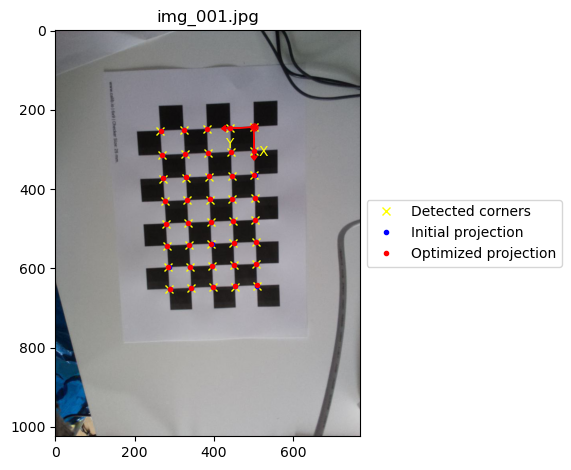

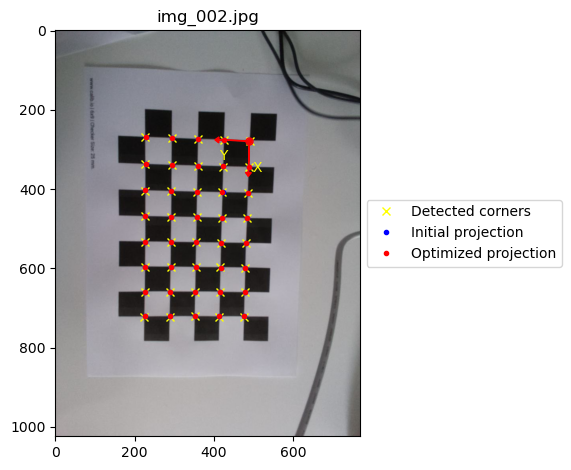

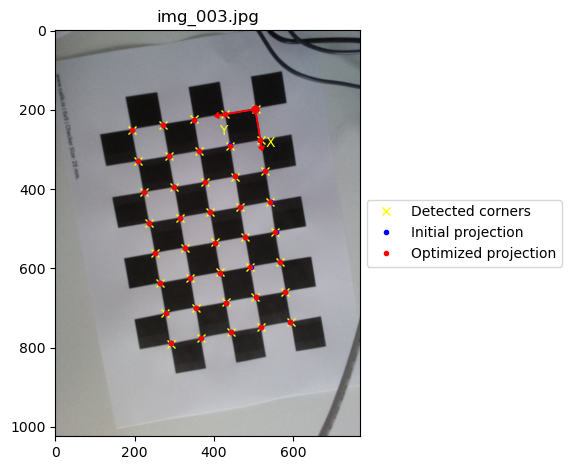

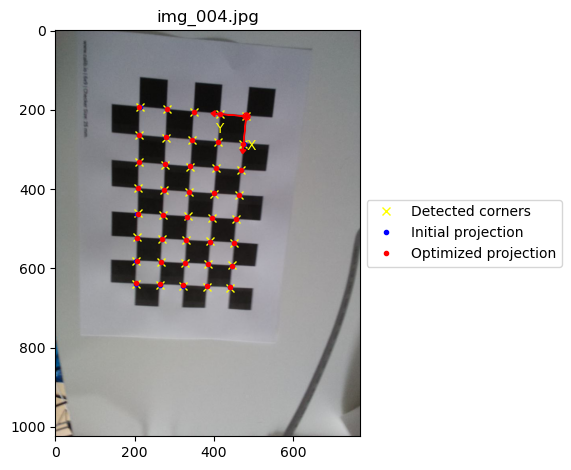

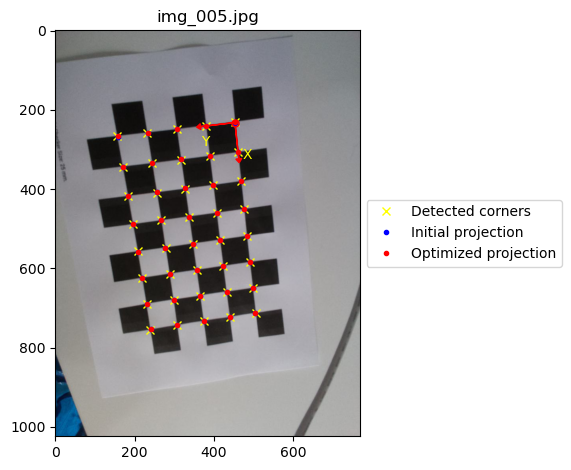

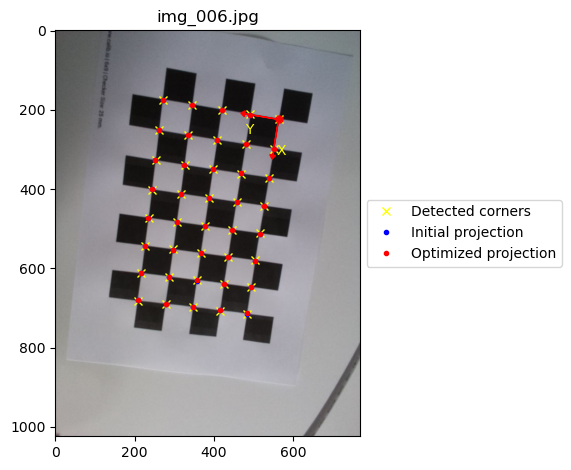

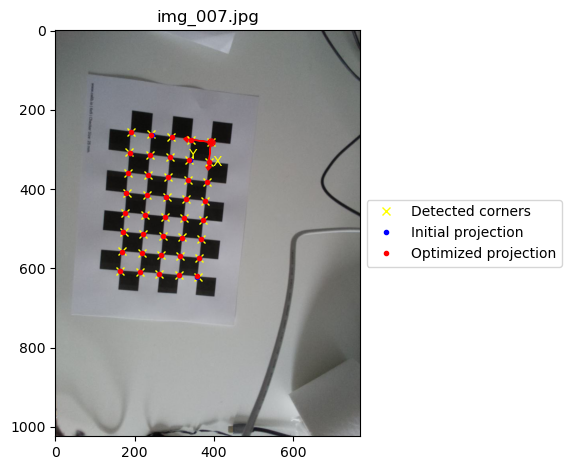

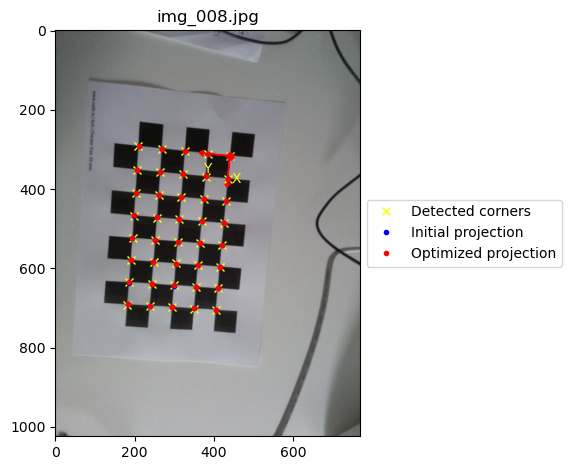

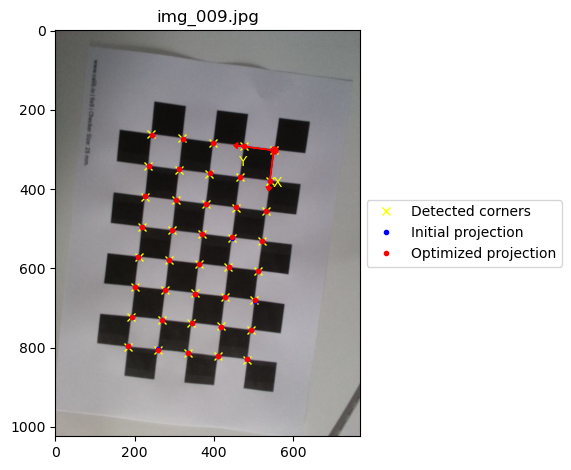

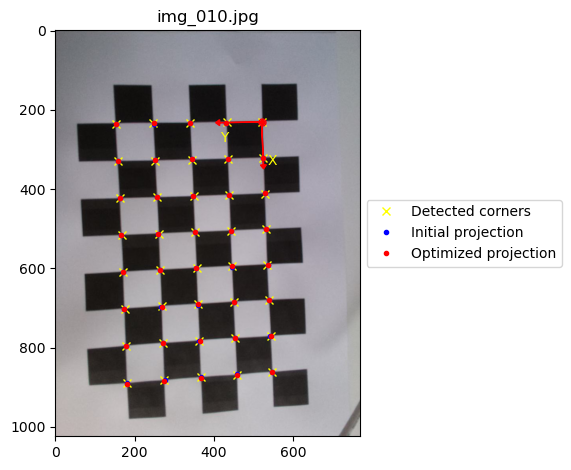

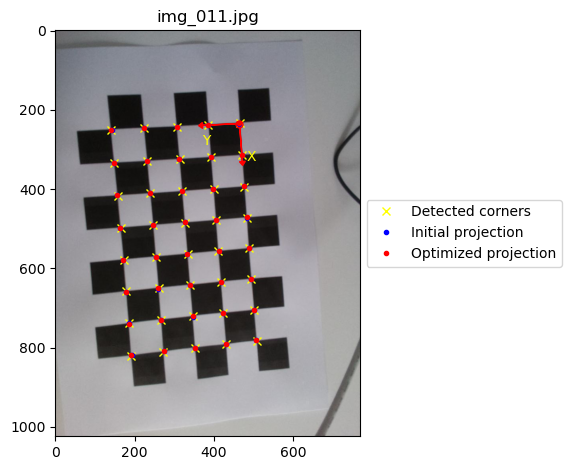

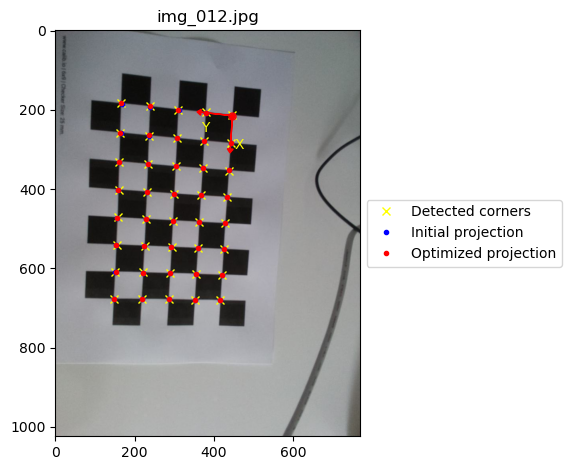

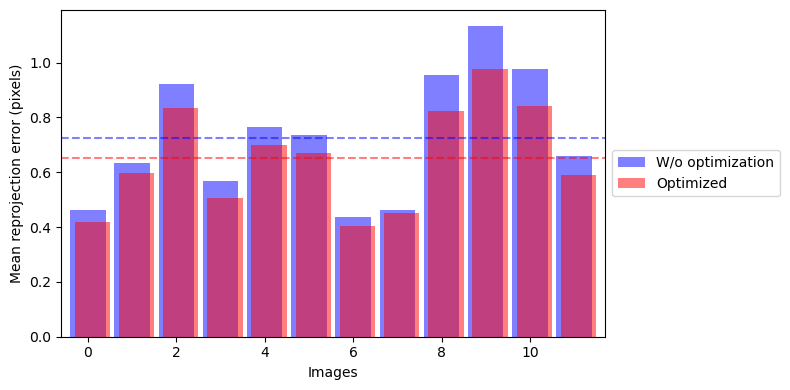

In [6]:

def main(input_files: dict, config: dict):

    if config["calibration_method"] == CalibMethod.OPENCV:
        calibrate_with_opencv(input_files, config)
    elif config["calibration_method"] == CalibMethod.MATLAB:
        calibrate_with_matlab(input_files, config)
    elif config["calibration_method"] == CalibMethod.ZHANG2000:
        calibrate_with_zhang_method(input_files, config)
    else:
        raise NotImplementedError("Select a right calibration method.")


main(input_files=INPUT_FILES, config=CONFIG)
